# EDA Injuries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os



In [2]:
merged_df_cleaned = pd.read_csv('data/injuries_merged_df_cleaned.csv')

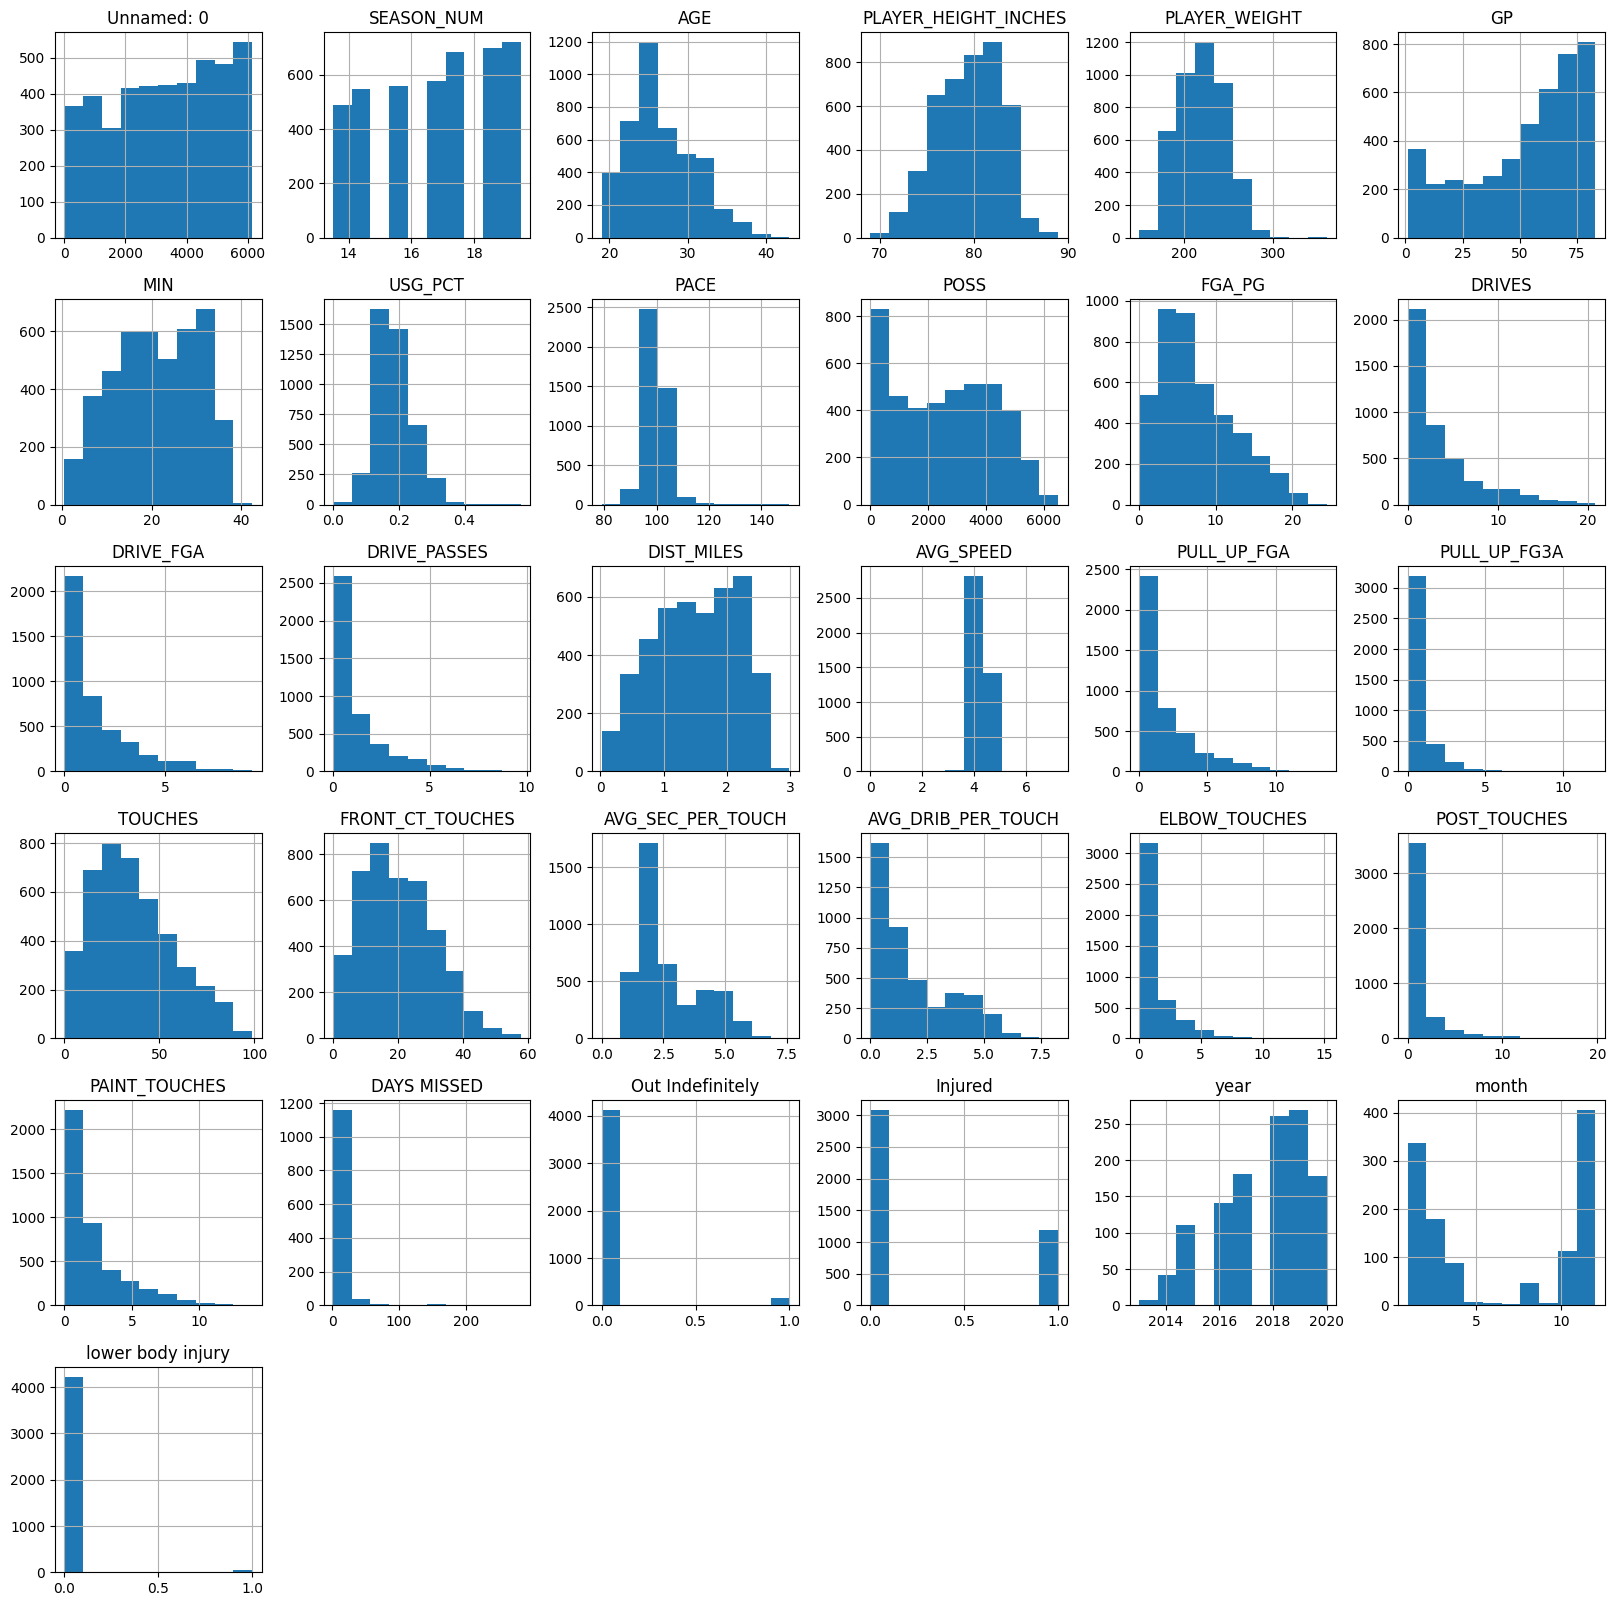

In [3]:
merged_df_cleaned.hist(figsize = (20,20))
plt.show()

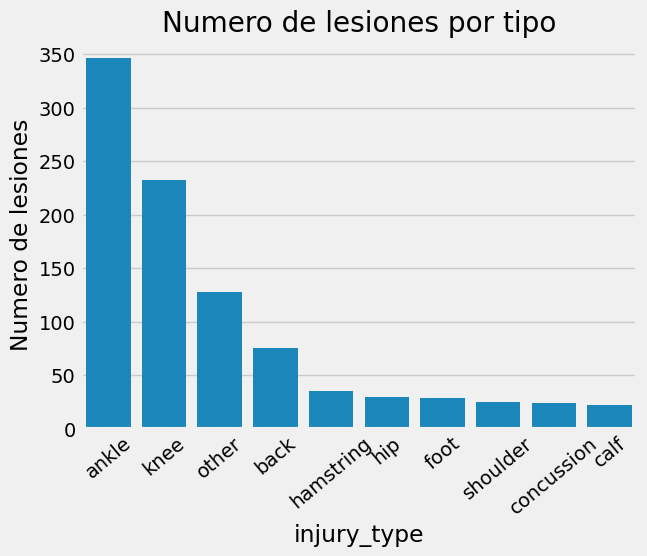

In [4]:
plt.style.use('fivethirtyeight')
sns.barplot(merged_df_cleaned['injury_type'].value_counts().head(10))
plt.xticks(rotation = 40)
plt.ylabel('Numero de lesiones')
plt.title('Numero de lesiones por tipo')
plt.show()


In [5]:
#Lesiones inferiores
merged_df_cleaned['lower body injury'] = np.where(merged_df_cleaned['body_part'] == 'Lower Body', 1, 0)
# Se crea un columna de binarios en donde si la lesion es de la parte inferior del cuerpo, se asigna 1, de lo contrario 0

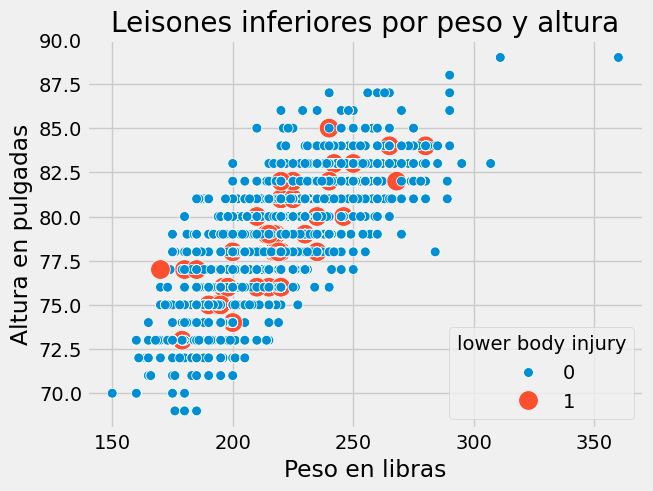

In [6]:
sns.scatterplot(x='PLAYER_WEIGHT', y='PLAYER_HEIGHT_INCHES', hue='lower body injury', data=merged_df_cleaned, size='lower body injury', sizes=(200, 50))
plt.ylabel('Altura en pulgadas')
plt.xlabel('Peso en libras')
plt.title('Leisones inferiores por peso y altura')
plt.show()

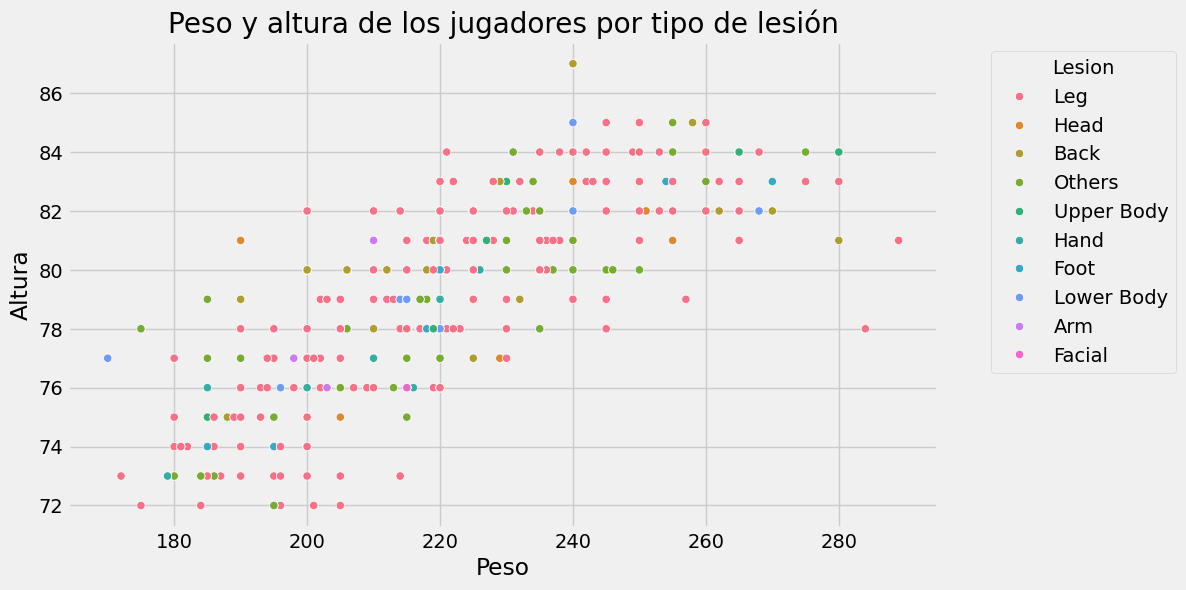

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PLAYER_WEIGHT', y='PLAYER_HEIGHT_INCHES', hue='body_part', data=merged_df_cleaned)
plt.title('Peso y altura de los jugadores por tipo de lesión')
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.legend(title='Lesion', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## No se observa una relacion clara entre el peso y la altura de los jugadores con las lesiones

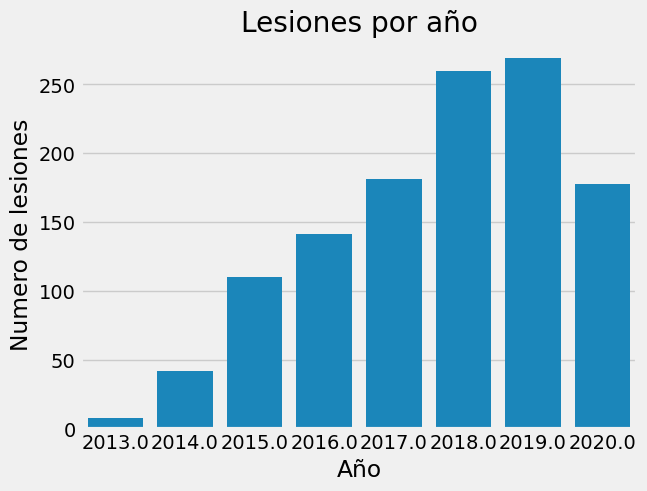

In [8]:
# Que año tuvo mas lesiones

year_counts = merged_df_cleaned['year'].value_counts()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel('Año')
plt.ylabel('Numero de lesiones')
plt.title('Lesiones por año')
plt.show()

# El 2019 es el año con mas lesiones, sin embargo, debemos investigar si es veridico o solo es una falta de datos

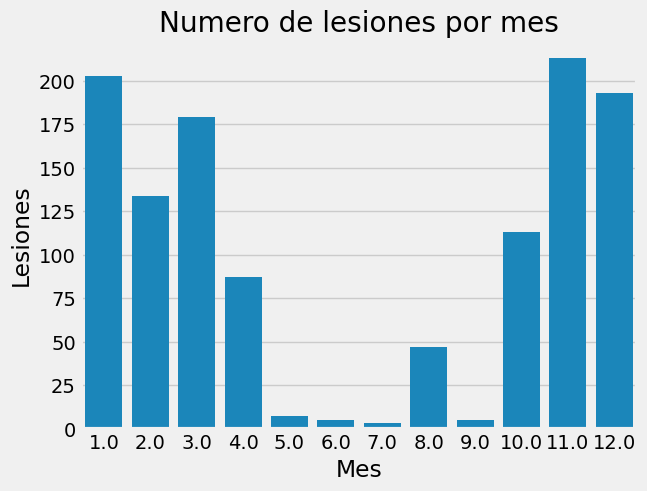

In [9]:
# Mes en que mas lesionados hubo

month_counts = merged_df_cleaned['month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xlabel('Mes')
plt.ylabel('Lesiones')
plt.title('Numero de lesiones por mes')
plt.show()

In [10]:
# Porcentaje de lesiones que dejan fuera indefinidamente a los jugadores o por un largo periodo

total_injuries = len(merged_df_cleaned[merged_df_cleaned['injury_type'].notna()])
out_indefinitely_count = merged_df_cleaned['Out Indefinitely'].sum()
percentage_out_indefinitely = (out_indefinitely_count / total_injuries) * 100

print(f"El porcentaje de lesiones indefinidas es: {percentage_out_indefinitely:.2f}%")

El porcentaje de lesiones indefinidas es: 12.28%


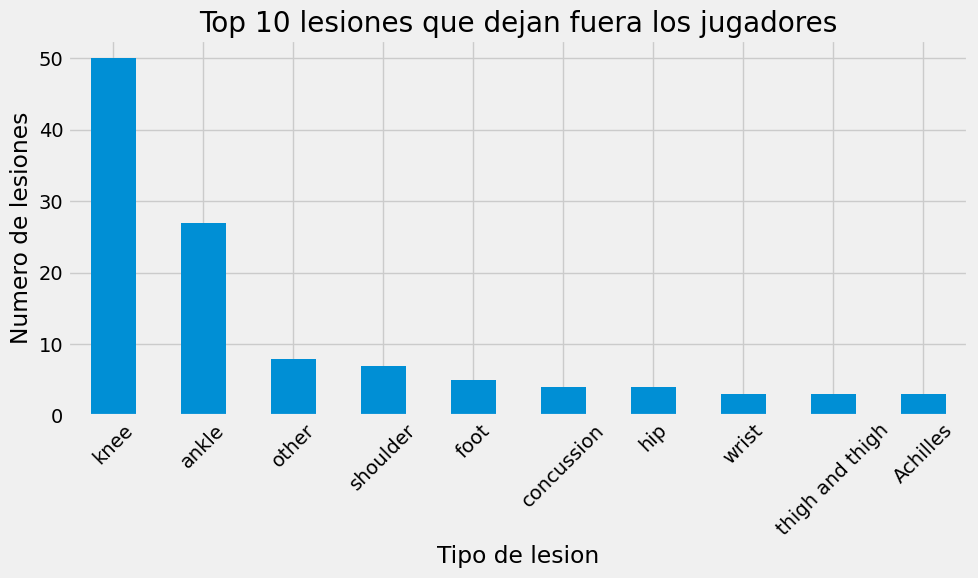

In [11]:
# Lesiones por las que mas jugadores quedan fuera indefinidamente
indefinite_injuries = merged_df_cleaned[merged_df_cleaned['Out Indefinitely'] == True]
injury_counts = indefinite_injuries['injury_type'].value_counts()
plt.figure(figsize=(10, 6))
injury_counts.head(10).plot(kind='bar')
plt.xlabel('Tipo de lesion')
plt.ylabel('Numero de lesiones')
plt.title('Top 10 lesiones que dejan fuera los jugadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



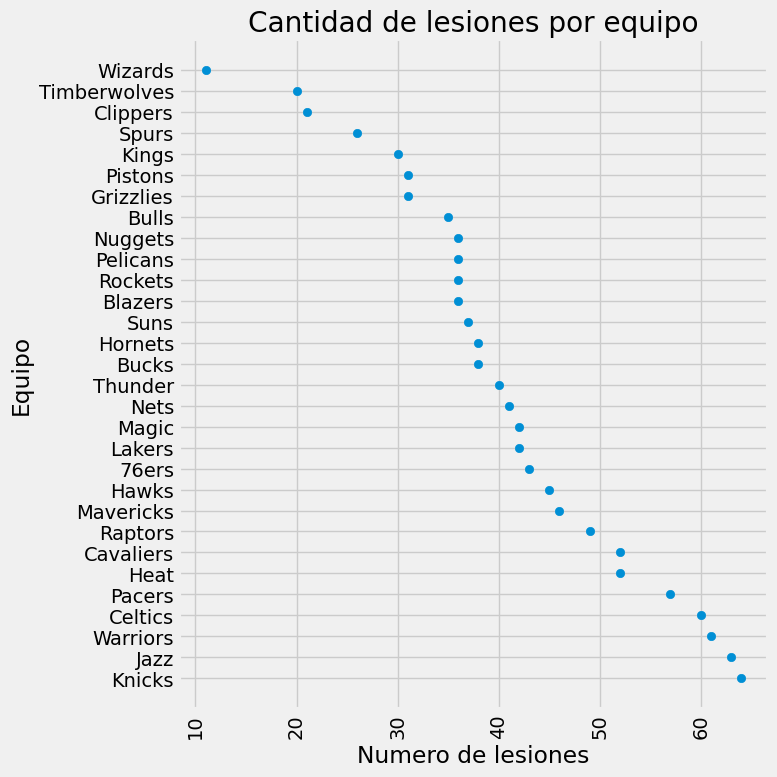

In [12]:
# Numero de lesiones por equipo
team_counts = merged_df_cleaned['TEAM'].value_counts()

# 30 equipos con mas lesiones
top_30_teams = team_counts.head(30)

# Equipo y numero de lesiones
teams = top_30_teams.values
counts = top_30_teams.index


plt.figure(figsize=(8, 8))
plt.scatter(teams, counts)
plt.xlabel('Numero de lesiones')
plt.ylabel('Equipo')
plt.title('Cantidad de lesiones por equipo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


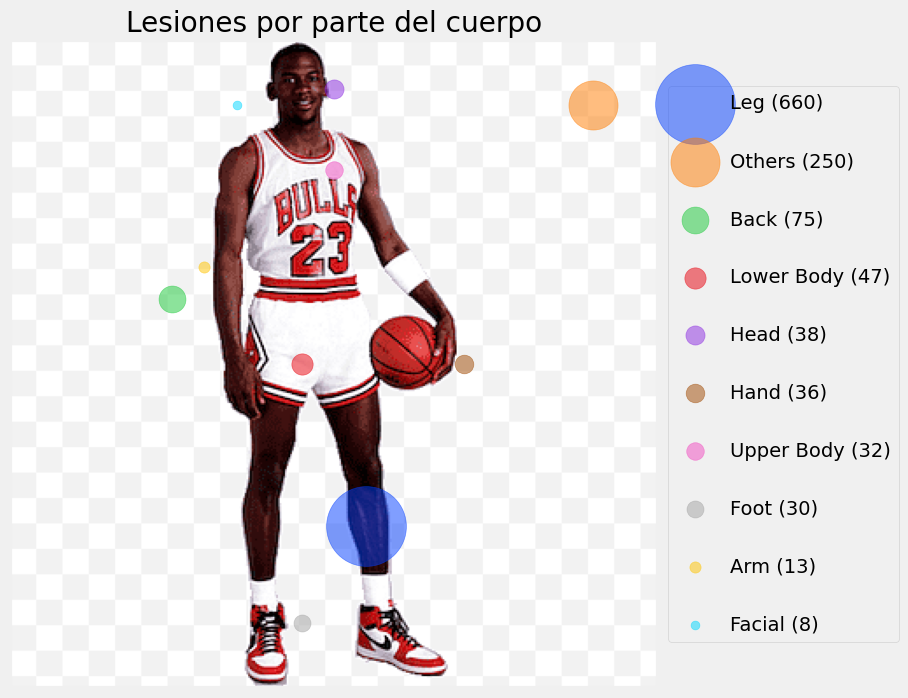

In [13]:
from PIL import Image

counts = merged_df_cleaned['body_part'].value_counts()

body_img = Image.open('../imagenes/jugador.png')
fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(body_img, extent=[0, 20, 0, 20])
bright_palette = sns.color_palette("bright")

for i, (injury, count) in enumerate(counts.items()):
    body_locations = {
        'Lower Body': (9, 10),
        'Leg': (11, 5),
        'Others': (18, 18),
        'Back': (5, 12),
        'Foot': (9, 2),
        'Hand': (14, 10),
        'Head': (10, 18.5),
        'Upper Body': (10, 16),
        'Facial': (7, 18),
        'Arm': (6, 13)
    }
    ax.scatter(*body_locations[injury], s=count*5, label=f'{injury} ({count})', alpha=0.5, color=bright_palette[i])


ax.set_title('Lesiones por parte del cuerpo')
plt.xticks([])
plt.yticks([])

plt.xlabel('')
plt.ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=2)
ax.set_aspect('equal')
plt.grid(False)
plt.show()

In [14]:
#merged_df_cleaned.groupby('id_player').agg({'GP': 'sum', 'body_part': 'count'}).sort_values(by = 'GP', ascending = False)


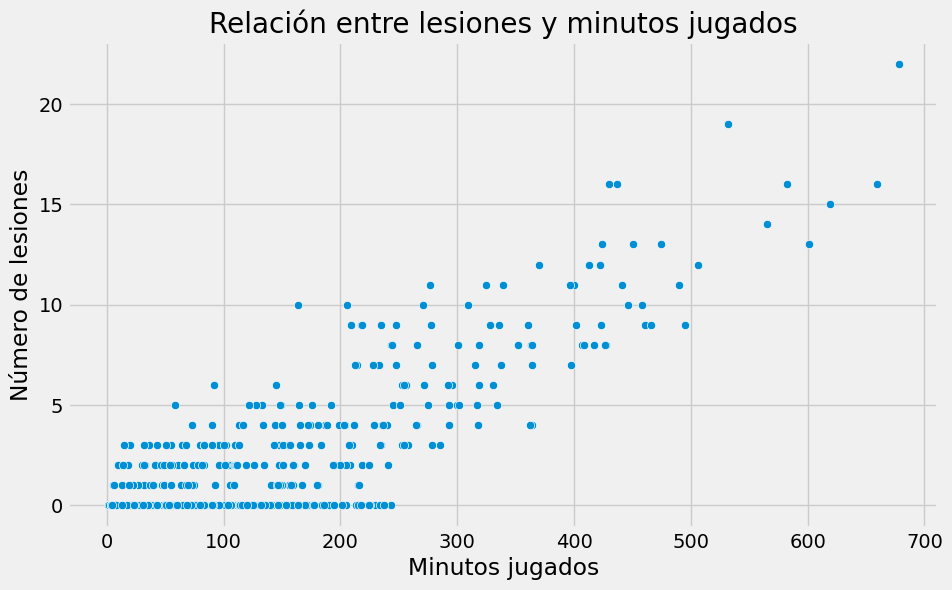

In [15]:
total_injury = merged_df_cleaned.groupby('PLAYER_NAME')['body_part'].count().reset_index()
player_gp_counts = merged_df_cleaned.groupby(['PLAYER_NAME', 'SEASON'])['MIN'].sum().reset_index()
player_gp_counts = player_gp_counts.groupby('PLAYER_NAME')['MIN'].sum().reset_index()
player_stats = pd.merge(total_injury, player_gp_counts, on='PLAYER_NAME')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MIN', y='body_part', data=player_stats)
plt.title('Relación entre lesiones y minutos jugados')
plt.xlabel('Minutos jugados')
plt.ylabel('Número de lesiones')
plt.show()

# Se observa que los jugadores que juegan mas minutos, tienden a tener mas lesiones

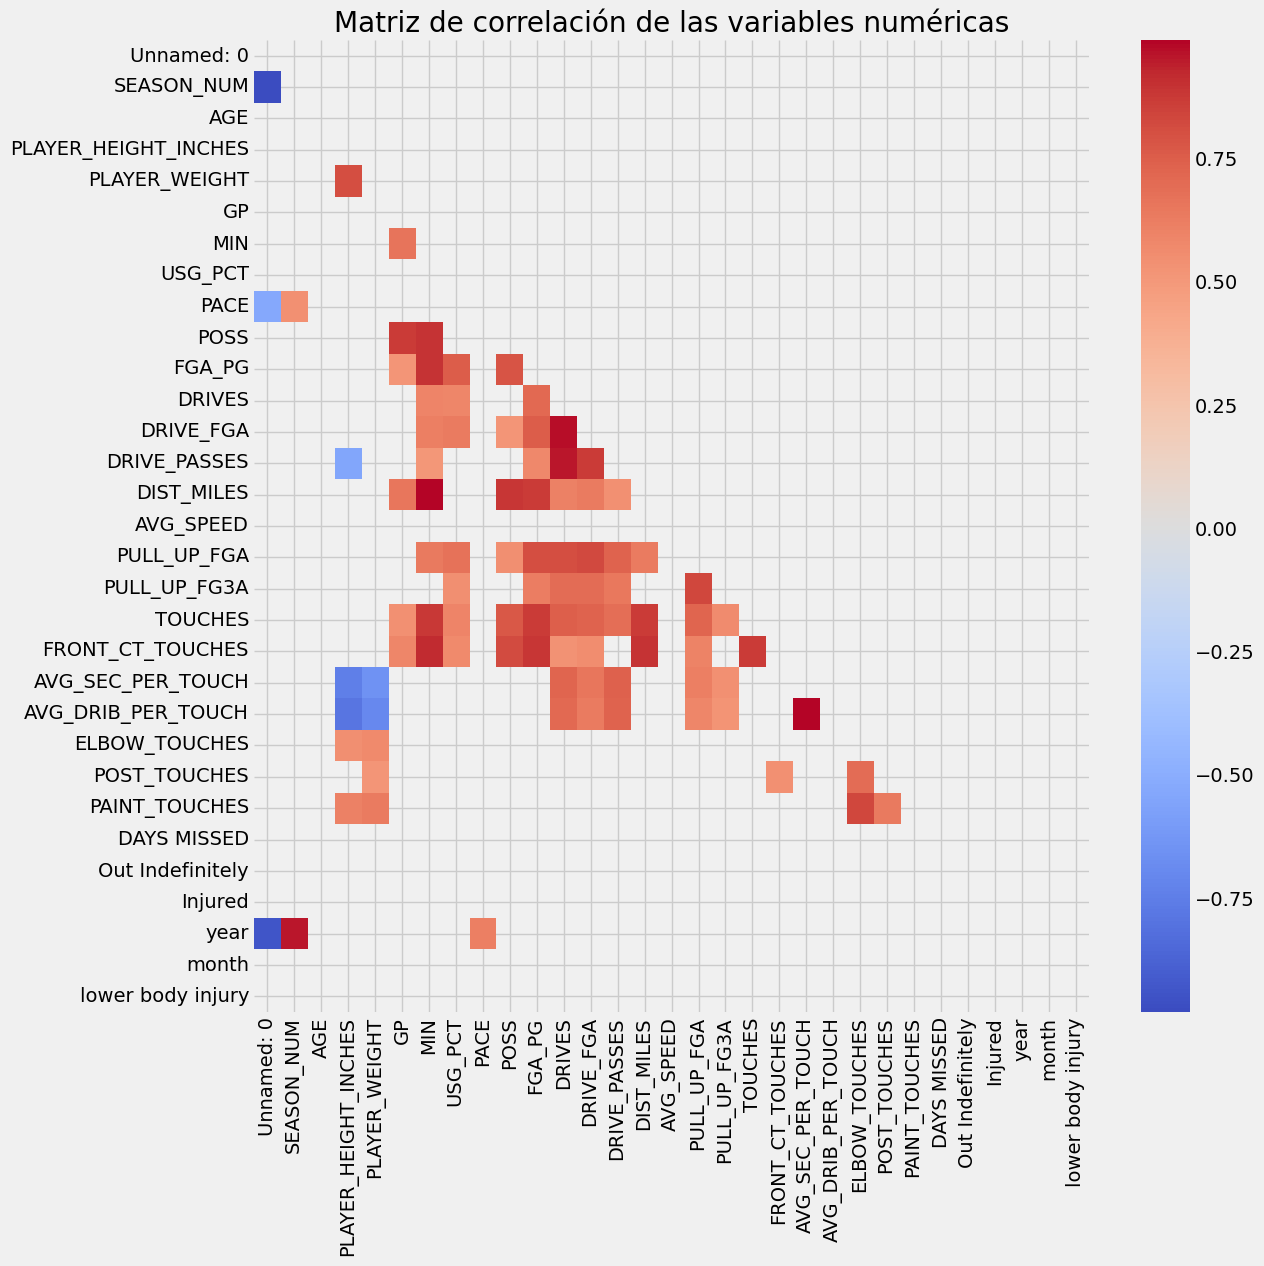

In [16]:
# Matriz de correlacion de las variables numericas
columnas_numericas = merged_df_cleaned.select_dtypes(include=[np.number]).columns
correlacion = merged_df_cleaned[columnas_numericas].corr()
plt.figure(figsize=(12, 12))
#Mostar solo donde la correlacion sea mayor a 0.5
mask= np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion[(correlacion >= 0.5) | (correlacion <= -0.5)], mask = mask, cmap='coolwarm')

plt.title('Matriz de correlación de las variables numéricas')
plt.show()